
# Recommendation system for e-commerce businesses
A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetted at new customers

Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

Recommendation system part III: When a business is setting up its e-commerce website for the first time withou any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

## Recommendation System - Part I
Product popularity based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
data = pd.read_excel(r'/Users/chiragsinghchaudhary/Downloads/Wiser_site_data.xlsx')
data

,customer_id,product_id,productname,product_type,product_description,ratings,timestamp
0,74.6.40.81,4883749797993,Infant Boys Mint Sweater Vest Set,Sweaters,<p>Soon to be a family favorite! It will make ...,5.0,1404518400
1,183.182.87.129,6664046379113,Baby Boys Holiday Sweater Romper,Playsuit,<p>How perfect is this for all your upcoming H...,1.0,1383177600
2,74.6.40.81,4883744391273,Boys Dino Camo Knit Shirt,Button Down Shirt,<p>Add a little extra fun to your little guy's...,1.0,1383177600
3,74.6.40.81,4180856209513,Infant Boy White Poplin Button-down,Button Down Shirt,<p>For the more formal events he has this fall...,1.0,1384992000
4,114.119.156.23,4883744784489,Boys Surfboards Graphic Tee Shirt,Tee Shirts,<p>Surfs up! He will be so ready to hit the wa...,1.0,1384992000
...,...,...,...,...,...,...,...
196,66.249.66.138,4180865056873,Infant Boy Grey Chambray Button-down,Button Down Shirt,<p>For the more formal events he has this fall...,2.0,1402704000
197,66.249.66.146,4794022428777,Girls Shimmer Jacket,Jackets,<p>She'll be the talk of the playground when s...,5.0,1403740800
198,66.249.66.148,4180865056873,Infant Boy Grey Chambray Button-down,Button Down Shirt,<p>For the more formal events he has this fall...,4.0,1367798400
199,17.121.113.148,4883749929065,Boys Navy Sweater Vest Set,Sweaters,<p>Soon to be a family favorite! It will make ...,3.0,1395705600


In [3]:
popular_products = pd.DataFrame(data.groupby('product_id')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
product_id,
4768013484137,5
6565937873001,4
4834730180713,3
2389889351785,3
4883749797993,3
4794022428777,3
4768013746281,3
4180865056873,3
4779064131689,3


<AxesSubplot:xlabel='product_id'>

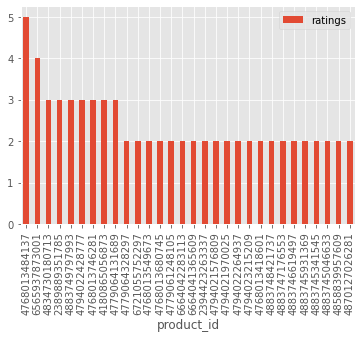

In [4]:
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 5, the next most popular product, ID # B0009V1YR8 has sales of 3, etc.

## Recommendation System - Part II
Model-based collaborative filtering system

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

### Utility Matrix based on products sold and user reviews
Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [5]:
# Ratings

data1 = data

In [6]:
ratings_utility_matrix = data1.pivot_table(values='ratings', index='customer_id', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,9345140739,9345147971,9345151427,464744939551,2357789491305,2357789556841,2357789687913,2389875982441,2389889351785,2389889450089,...,6664046411881,6664046444649,6664046641257,6664046837865,6679553638505,6679554162793,6679554490473,6721055752297,6725915705449,6725915869289
customer_id,,,,,,,,,,,,,,,,,,,,,
100.35.196.205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107.77.224.224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107.77.241.52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108.54.113.139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114.119.155.239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [7]:
ratings_utility_matrix.shape

(76, 148)

Transposing the matrix

In [8]:
X = ratings_utility_matrix.T
X.head()

customer_id,100.35.196.205,107.77.224.224,107.77.241.52,108.54.113.139,114.119.155.239,114.119.156.120,114.119.156.23,114.119.157.250,168.119.65.45,168.119.68.240,...,69.114.208.229,72.139.200.67,73.181.253.160,73.49.234.86,74.6.40.81,74.75.45.210,76.102.115.251,76.24.91.0,76.91.10.51,80.174.244.240
product_id,,,,,,,,,,,,,,,,,,,,,
9345140739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9345147971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9345151427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464744939551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357789491305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X.shape

(148, 76)

In [10]:
X1 = X

## Decomposing the Matrix

In [11]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(148, 10)

In [12]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(148, 148)

correlation_matrix

## Isolating Product ID # 4794023215209 from the Correlation Matrix

Assuming the customer buys Product ID # 4794023215209 (randomly chosen)

In [13]:
X.index[59]

4794023215209

Index # of product ID purchased by customer

In [14]:
i = 4794023215209

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

59

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [15]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(148,)

#### Recommending top 10 highly correlated products in sequence

In [16]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[4652167921769,
 4794021970025,
 4794022789225,
 4794023444585,
 4851497336937,
 4870127288425]

Product Id #

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.



# Recommendation System - Part III
For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [17]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [18]:
product_descriptions = data[["product_id", "product_description"]]
product_descriptions

,product_id,product_description
0,4883749797993,<p>Soon to be a family favorite! It will make ...
1,6664046379113,<p>How perfect is this for all your upcoming H...
2,4883744391273,<p>Add a little extra fun to your little guy's...
3,4180856209513,<p>For the more formal events he has this fall...
4,4883744784489,<p>Surfs up! He will be so ready to hit the wa...
...,...,...
196,4180865056873,<p>For the more formal events he has this fall...
197,4794022428777,<p>She'll be the talk of the playground when s...
198,4180865056873,<p>For the more formal events he has this fall...
199,4883749929065,<p>Soon to be a family favorite! It will make ...


Checking for missing values

In [19]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_id,product_description
0,4883749797993,<p>Soon to be a family favorite! It will make ...
1,6664046379113,<p>How perfect is this for all your upcoming H...
2,4883744391273,<p>Add a little extra fun to your little guy's...
3,4180856209513,<p>For the more formal events he has this fall...
4,4883744784489,<p>Surfs up! He will be so ready to hit the wa...


In [20]:
product_descriptions1 = product_descriptions.head(100)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    <p>Soon to be a family favorite! It will make ...
1    <p>How perfect is this for all your upcoming H...
2    <p>Add a little extra fun to your little guy's...
3    <p>For the more formal events he has this fall...
4    <p>Surfs up! He will be so ready to hit the wa...
5    <p>A Hacci set that is so soft and versatile, ...
6    <p data-mce-fragment="1">Get your girl ready f...
7    <p>A super-soft getup that will have him ready...
8    <h1>For Your Little Gentleman</h1>\n<p>For the...
9    <p>From starting a neighborhood snowball fight...
Name: product_description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [21]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<100x939 sparse matrix of type '<class 'numpy.float64'>'
	with 4649 stored elements in Compressed Sparse Row format>

### Visualizing product clusters in subset of data

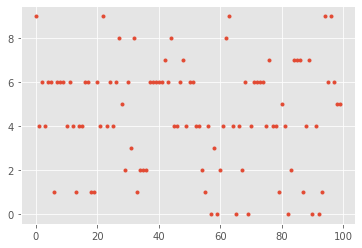

In [22]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

### Top words in each cluster based on product description

In [23]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 li
 super
 soft
 cool
 material
 adventures
 dude
 flat
 max
 feeling
Cluster 1:
 li
 ul
 imported
 classic
 button
 cotton
 br
 medium
 cold
 machine
Cluster 2:
 li
 faux
 fur
 polyester
 100
 hood
 shiny
 polyeser
 gentle
 cycle
Cluster 3:
 fragment
 mce
 data
 li
 span
 pom
 acrylic
 ul
 gingham
 designed
Cluster 4:
 span
 font
 400
 style
 weight
 tab
 div
 li
 segoe
 ui
Cluster 5:
 li
 ul
 cotton
 dry
 pants
 sweater
 cool
 look
 super
 set
Cluster 6:
 li
 protection
 shorts
 feel
 elements
 rash
 guard
 secure
 polyester
 board
Cluster 7:
 li
 pants
 lining
 tortoise
 time
 tan
 hole
 flap
 happens
 born
Cluster 8:
 strong
 mask
 filter
 li
 masks
 pack
 printed
 face
 span
 included
Cluster 9:
 li
 sun
 matching
 line
 shade
 drawstring
 protection
 closure
 swim
 fitted


### Predicting clusters based on key search words

In [24]:
# Sweaters
print("Cluster ID:")
Y = vectorizer.transform(["Sweaters"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [25]:
# Boys Dino Camo Knit Shirt
print("Cluster ID:")
Y = vectorizer.transform(["Boys Dino Camo Knit Shirt"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [26]:
# bomber 
print("Cluster ID:")
Y = vectorizer.transform(["bomber"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

In [27]:
# 100%  cotton
print("Cluster ID:")
Y = vectorizer.transform(["100%  cotton"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [28]:
# Boys Dino Camo Knit Shirt
print("Cluster ID:")
Y = vectorizer.transform(["Boys Dino Camo Knit Shirt"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

##### Summary:

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.